# 1. Dataset Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

# 2. Data Preprocessing

In [5]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
strength                                                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   strength                                         

In [7]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate','Age (day)','strength']

In [9]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Check Outliers

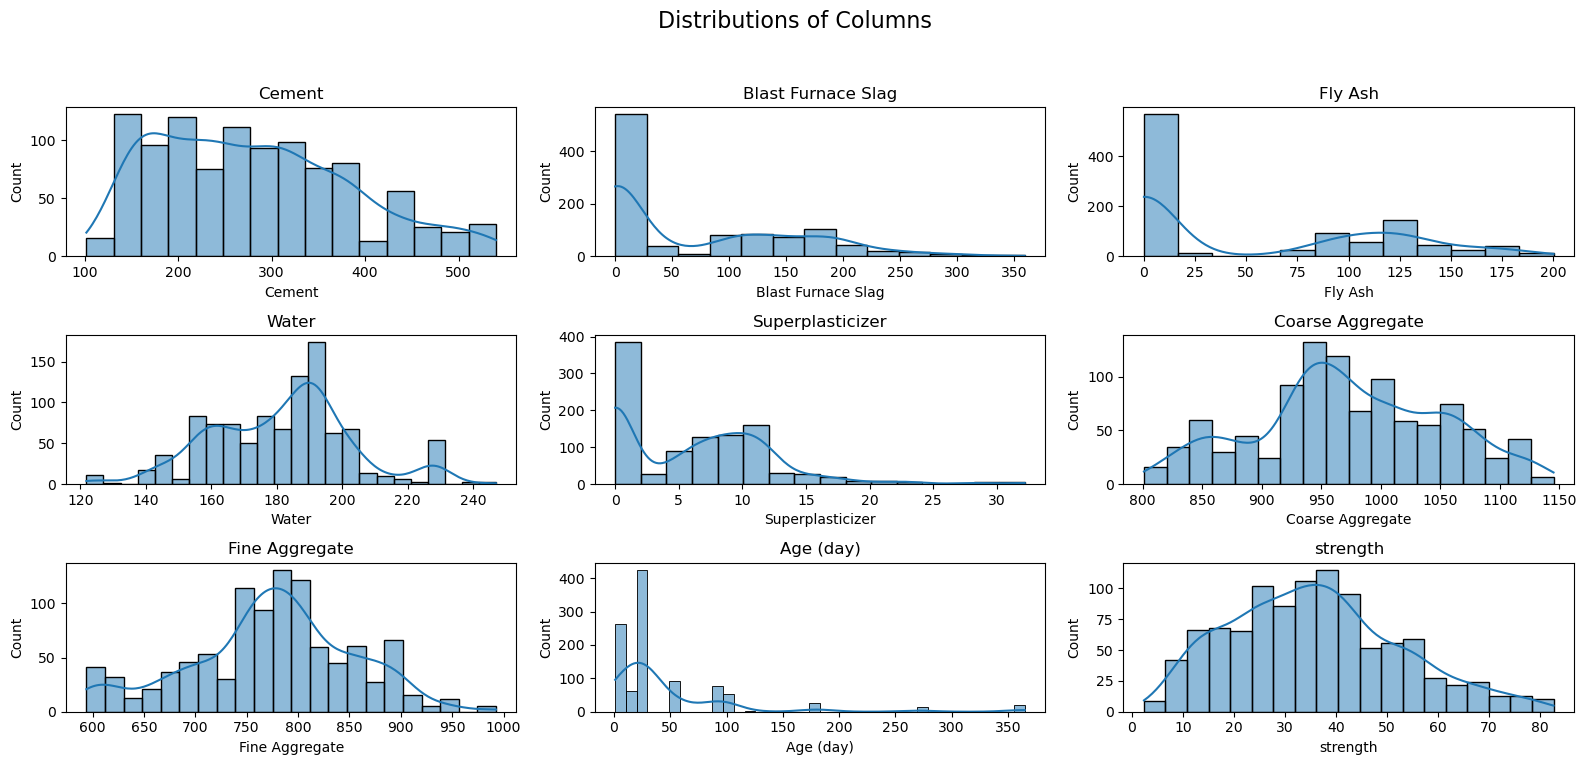

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 8))
fig.suptitle('Distributions of Columns', fontsize=16)

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Iterate through each column and plot the distribution
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

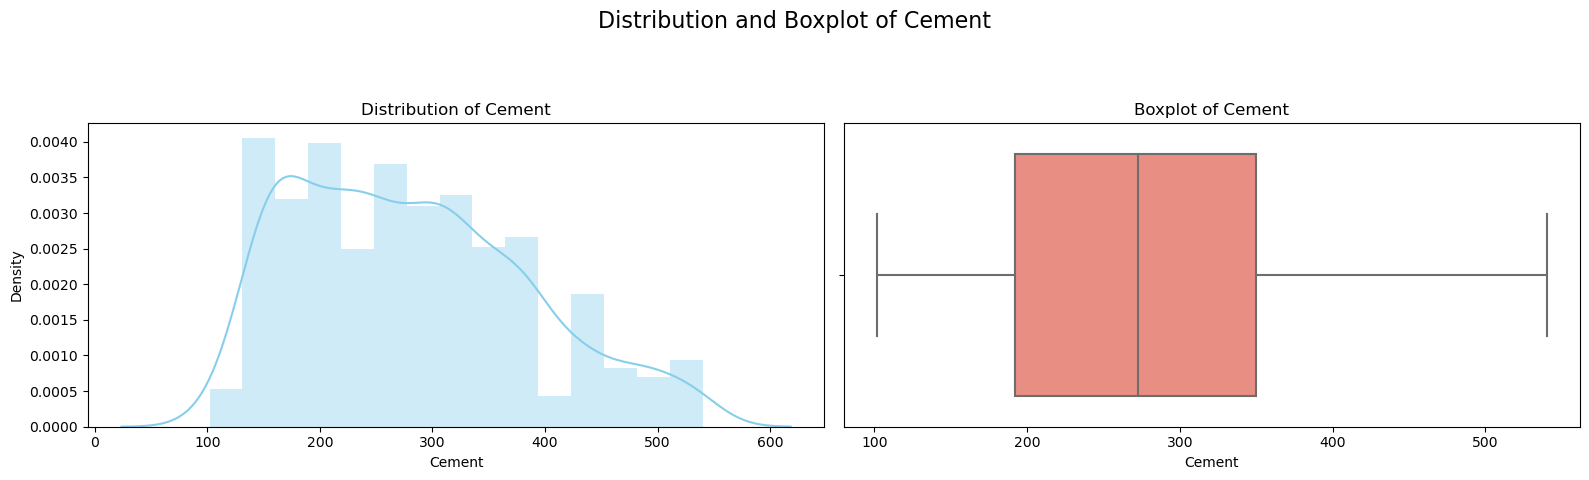

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
fig.suptitle('Distribution and Boxplot of Cement', fontsize=16)

# Plot the distribution
sns.distplot(df['Cement'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Cement')

# Plot the boxplot
sns.boxplot(x=df['Cement'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of Cement')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

# Show the plots
plt.show()

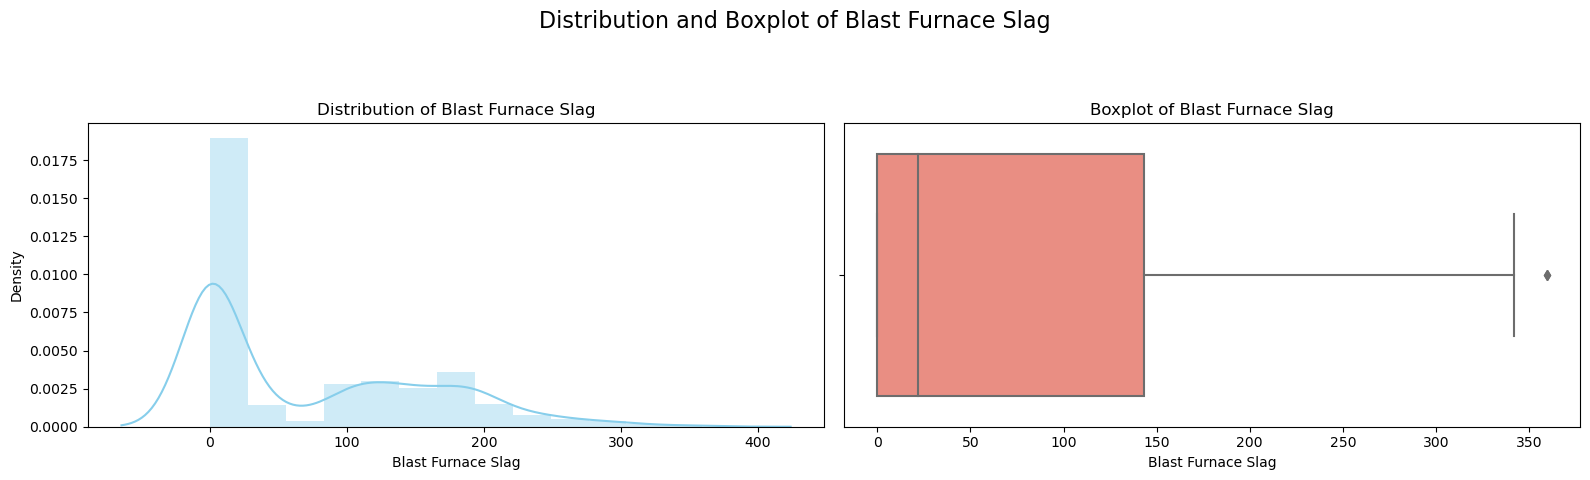

In [12]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
fig.suptitle('Distribution and Boxplot of Blast Furnace Slag', fontsize=16)

# Plot the distribution
sns.distplot(df['Blast Furnace Slag'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Blast Furnace Slag')

# Plot the boxplot
sns.boxplot(x=df['Blast Furnace Slag'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of Blast Furnace Slag')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

# Show the plots
plt.show()


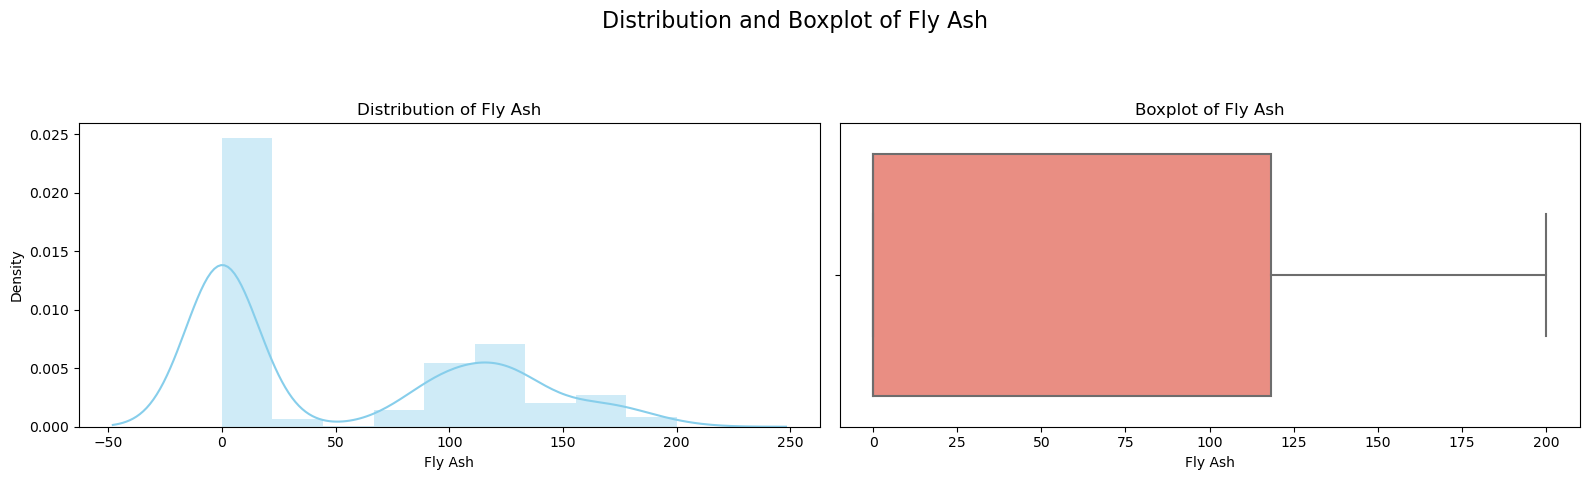

In [13]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
fig.suptitle('Distribution and Boxplot of Fly Ash', fontsize=16)

# Plot the distribution
sns.distplot(df['Fly Ash'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Fly Ash')

# Plot the boxplot
sns.boxplot(x=df['Fly Ash'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of Fly Ash')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

# Show the plots
plt.show()


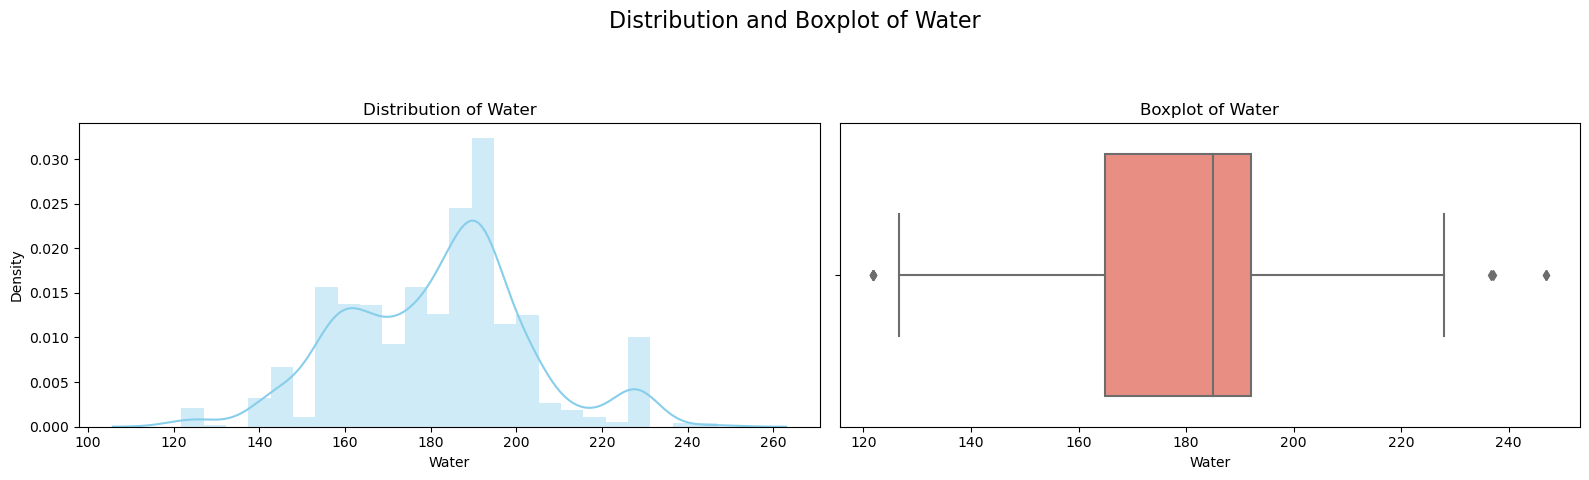

In [14]:
# Set up the figure and axes for Water
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
fig.suptitle('Distribution and Boxplot of Water', fontsize=16)

# Plot the distribution for Water
sns.distplot(df['Water'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Water')

# Plot the boxplot for Water
sns.boxplot(x=df['Water'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of Water')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

# Show the plots for Water
plt.show()


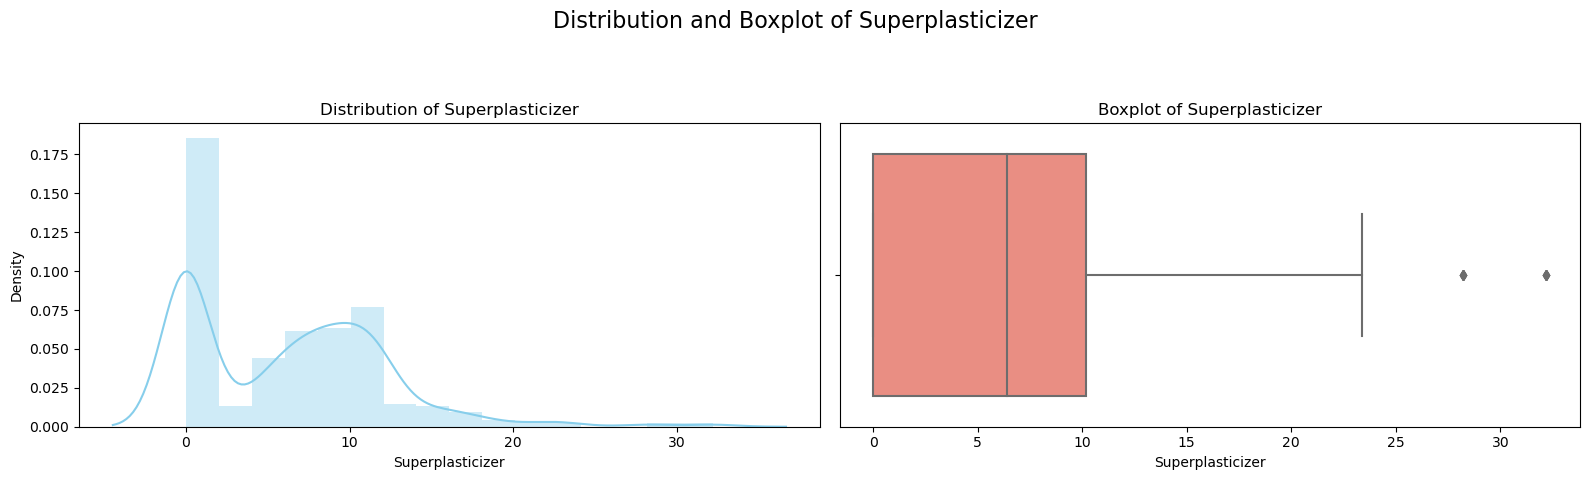

In [15]:
# Set up the figure and axes for Superplasticizer
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
fig.suptitle('Distribution and Boxplot of Superplasticizer', fontsize=16)

# Plot the distribution for Superplasticizer
sns.distplot(df['Superplasticizer'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Superplasticizer')

# Plot the boxplot for Superplasticizer
sns.boxplot(x=df['Superplasticizer'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of Superplasticizer')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

# Show the plots for Superplasticizer
plt.show()

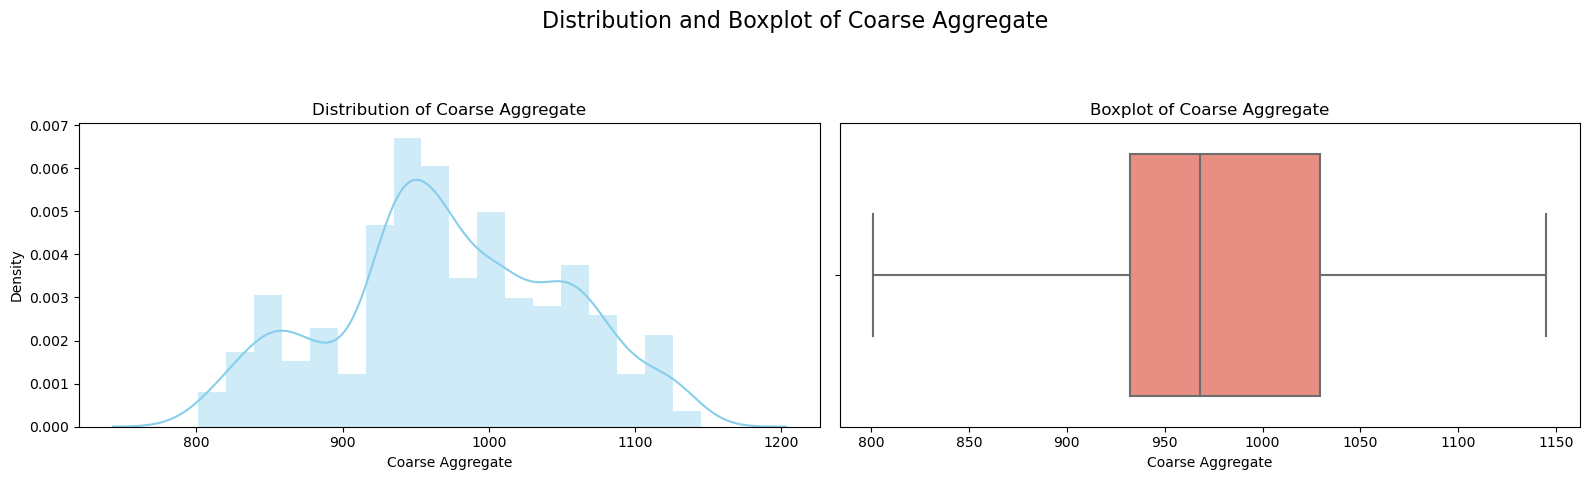

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
fig.suptitle('Distribution and Boxplot of Coarse Aggregate', fontsize=16)

# Plot the distribution for Coarse Aggregate
sns.distplot(df['Coarse Aggregate'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Coarse Aggregate')

# Plot the boxplot for Coarse Aggregate
sns.boxplot(x=df['Coarse Aggregate'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of Coarse Aggregate')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

# Show the plots for Coarse Aggregate
plt.show()

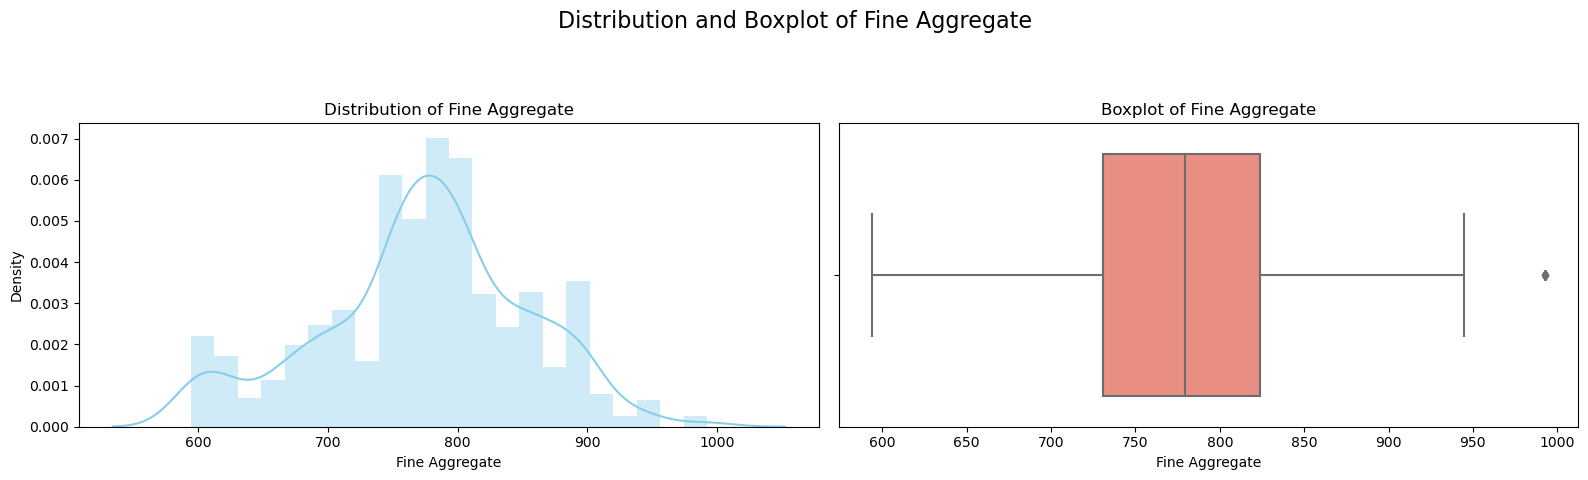

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
fig.suptitle('Distribution and Boxplot of Fine Aggregate', fontsize=16)

# Plot the distribution for Fine Aggregate
sns.distplot(df['Fine Aggregate'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Fine Aggregate')

# Plot the boxplot for Fine Aggregate
sns.boxplot(x=df['Fine Aggregate'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of Fine Aggregate')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

# Show the plots for Fine Aggregate
plt.show()


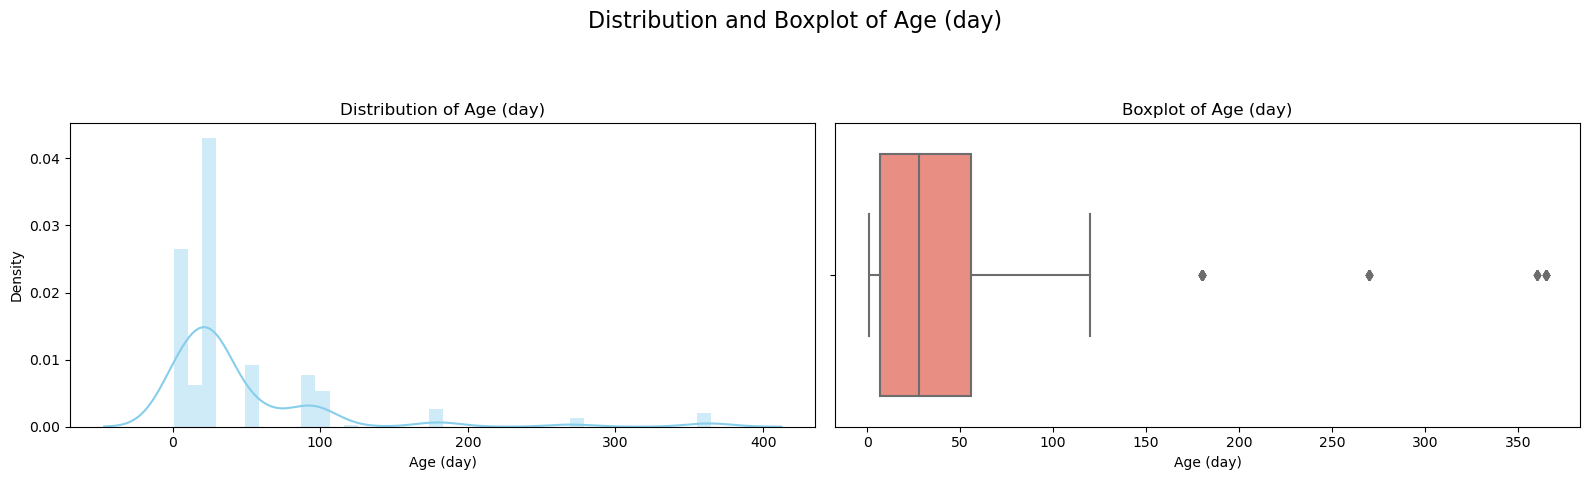

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
fig.suptitle('Distribution and Boxplot of Age (day)', fontsize=16)

# Plot the distribution for Age (day)
sns.distplot(df['Age (day)'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Age (day)')

# Plot the boxplot for Age (day)
sns.boxplot(x=df['Age (day)'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of Age (day)')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

# Show the plots for Age (day)
plt.show()

In [19]:
X = df.drop('strength', axis = 1)
y = df['strength']

In [20]:
X.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [21]:
y.head(2)

0    79.99
1    61.89
Name: strength, dtype: float64

# Applied Normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
X_train_scaled

array([[0.12922374, 0.41430161, 0.59487179, ..., 0.44273256, 0.31535374,
        0.07417582],
       [0.73515982, 0.06121313, 0.67692308, ..., 0.06104651, 0.39136979,
        0.07417582],
       [0.39520548, 0.        , 0.6225641 , ..., 0.73430233, 0.46036126,
        0.00549451],
       ...,
       [0.20159817, 0.        , 0.64205128, ..., 0.80813953, 0.51404917,
        0.27197802],
       [0.85159817, 0.33055092, 0.        , ..., 0.14854651, 0.47039639,
        0.07417582],
       [0.48401826, 0.        , 0.57948718, ..., 0.36046512, 0.47415956,
        0.07417582]])

In [25]:
X_train.shape

(824, 8)

In [26]:
X_test_scaled.shape

(206, 8)

# 3. Model Selection:

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 4. Model Training

train Linear Regression

In [28]:
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)

Train RandomForestRegressor

In [29]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)

Train RandomForestRegressor

In [30]:
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = model_xgb.predict(X_test_scaled)

# 5. Evaluation Metrics:


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [32]:
print("Linear Regression: ")

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)


print("Mean Absolute Error (MAE):", mae_linear)
print("Mean Squared Error (MSE):", mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("R-squared (R2) score:", r2_linear)

Linear Regression: 
Mean Absolute Error (MAE): 7.745559243921431
Mean Squared Error (MSE): 95.97094009110691
Root Mean Squared Error (RMSE): 9.796475901624365
R-squared (R2) score: 0.6275531792314846


In [33]:
print("RandomForestRegressor: ")

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)


print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2) score:", r2_rf)

RandomForestRegressor: 
Mean Absolute Error (MAE): 3.738269765950071
Mean Squared Error (MSE): 29.90901641957394
Root Mean Squared Error (RMSE): 5.4689136416270046
R-squared (R2) score: 0.8839282175707699


In [34]:
print("XGBRegressor: ")

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)


print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared (R2) score:", r2_xgb)

XGBRegressor: 
Mean Absolute Error (MAE): 2.996374957538346
Mean Squared Error (MSE): 21.21804757371494
Root Mean Squared Error (RMSE): 4.606305197630194
R-squared (R2) score: 0.9176563827108167


# 6. Feature Importance

- If applicable (e.g., for Random Forest or Gradient Boosting models), analyze and 
interpret feature importance for insights into what influences concrete strength 
the most.


# Random Forest Feature Importance

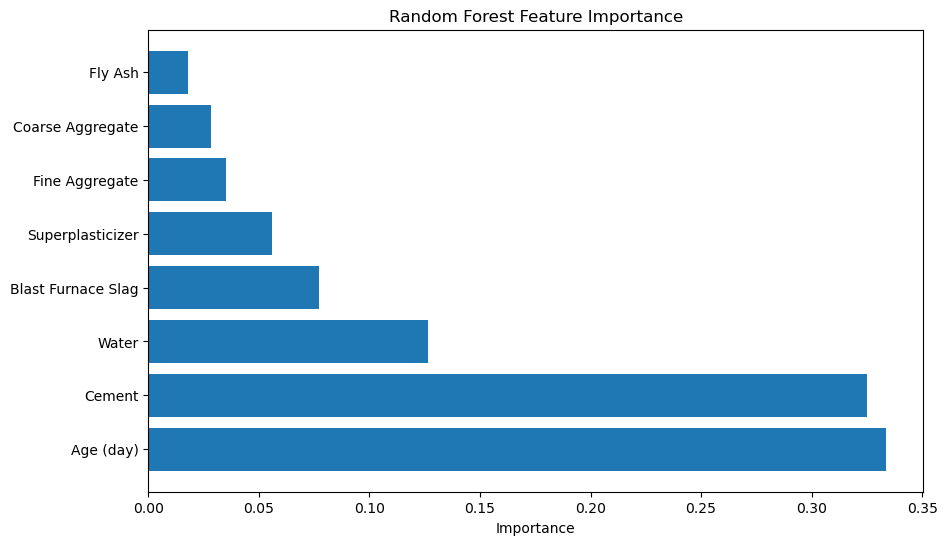

              Feature  Importance
7           Age (day)    0.333812
0              Cement    0.325029
3               Water    0.126405
1  Blast Furnace Slag    0.077405
4    Superplasticizer    0.056133
6      Fine Aggregate    0.035130
5    Coarse Aggregate    0.028127
2             Fly Ash    0.017960


In [35]:
# Get feature importances
feature_importances_rf = model_rf.feature_importances_

# Create a DataFrame to display feature importances
importances_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
importances_df_rf = importances_df_rf.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df_rf['Feature'], importances_df_rf['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Display the sorted feature importances
print(importances_df_rf)


# Gradient Boosting (XGBoost) Feature Importance:

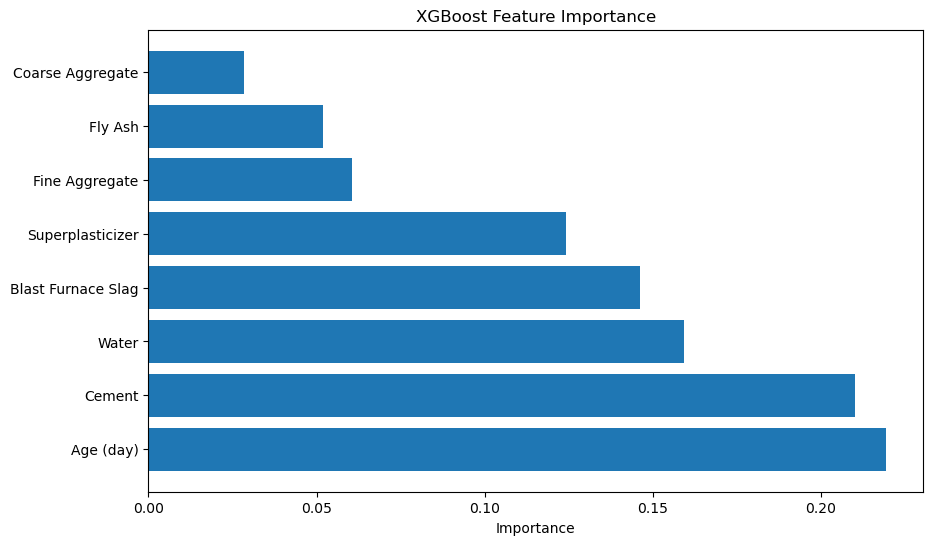

              Feature  Importance
7           Age (day)    0.219457
0              Cement    0.210049
3               Water    0.159285
1  Blast Furnace Slag    0.146158
4    Superplasticizer    0.124044
6      Fine Aggregate    0.060436
2             Fly Ash    0.052003
5    Coarse Aggregate    0.028567


In [36]:
# Get feature importances
feature_importances_xgb = model_xgb.feature_importances_

# Create a DataFrame to display feature importances
importances_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_xgb})
importances_df_xgb = importances_df_xgb.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df_xgb['Feature'], importances_df_xgb['Importance'])
plt.xlabel('Importance')
plt.title('XGBoost Feature Importance')
plt.show()

# Display the sorted feature importances
print(importances_df_xgb)

# Interpretation:


Feature Importance Plot:

The bar plot visualizes the importance of each feature, with taller bars indicating more important features.
Features with higher importance contribute more to the model's predictions.


DataFrame:

The DataFrame shows the features sorted by importance, providing a numerical ranking.
Examining the DataFrame allows you to see the specific values associated with each feature.

# 7. Hyperparameter Tuning:


# Hyperparameter Tuning with Grid Search (Random Forest)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# Create a pipeline with scaling and Random Forest regression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Use Min-Max scaling
    ('rf', RandomForestRegressor(random_state=42))
])

# Define hyperparameters to search
param_grid = {
    'rf__n_estimators': [50, 100, 200],            # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'rf__min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [1, 2, 4]              # Minimum number of samples required to be at a leaf node
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_rf_test = best_model.predict(X_test)

mae_rf_test = mean_absolute_error(y_test, y_pred_rf_test)
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
rmse_rf_test = mean_squared_error(y_test, y_pred_rf_test, squared=False)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

print('Best Hyperparameters: ',best_params)
print("Mean Absolute Error (MAE) final:", mae_rf_test)
print("Mean Squared Error (MSE) final:", mse_rf_test)
print("Root Mean Squared Error (RMSE) final:", rmse_rf_test)
print("R-squared (R2) score:", r2_rf_test)



Best Hyperparameters:  {'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Mean Absolute Error (MAE) final: 3.792797086245069
Mean Squared Error (MSE) final: 30.71220189941921
Root Mean Squared Error (RMSE) final: 5.541859065279377
R-squared (R2) score: 0.8808111919568515


After obtaining the best hyperparameters from Grid Search, we should use these optimal hyperparameters for our model. The purpose of hyperparameter tuning is to find the combination of hyperparameters that maximizes the model's performance on the validation set. Once we have identified these optimal hyperparameters, we should use them for any subsequent model evaluation, including on the test set

Here's how we can proceed:

In [38]:
final_model = Pipeline([
    ('scaler', MinMaxScaler()),  # Use Min-Max scaling
    ('rf', RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42))
])

# Fit the final model on the entire training dataset
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_rf_final = final_model.predict(X_test)

mae_rf_final = mean_absolute_error(y_test, y_pred_rf_final)
mse_rf_final = mean_squared_error(y_test, y_pred_rf_final)
rmse_rf_final = mean_squared_error(y_test, y_pred_rf_final, squared=False)
r2_rf_final = r2_score(y_test, y_pred_rf_final)


print("Mean Absolute Error (MAE) final:", mae_rf_final)
print("Mean Squared Error (MSE) final:", mse_rf_final)
print("Root Mean Squared Error (RMSE) final:", rmse_rf_final)
print("R-squared (R2) score:", r2_rf_final)


Mean Absolute Error (MAE) final: 3.792797086245069
Mean Squared Error (MSE) final: 30.71220189941921
Root Mean Squared Error (RMSE) final: 5.541859065279377
R-squared (R2) score: 0.8808111919568515


Before applied" Hyperparameter Tuning with Grid Search (Random Forest)" we got more good result than this, IN below I provided the reuslt:

    

RandomForestRegressor: 

Mean Absolute Error (MAE): 3.738269765950071

Mean Squared Error (MSE): 29.90901641957394

Root Mean Squared Error (RMSE): 5.4689136416270046

R-squared (R2) score: 0.8839282175707699

    
We can say that for our dataset " Hyperparameter Tuning with Grid Search (Random Forest)" isn't good.

# Hyperparameter Tuning with Random Search (Random Forest)

In [39]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats


pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Use Min-Max scaling
    ('rf', RandomForestRegressor(random_state=42))
])

# Define hyperparameters and their distributions for random sampling
param_dist = {
    'rf__n_estimators': stats.randint(50, 200),         # Number of trees in the forest
    'rf__max_depth': [None] + list(stats.randint(10, 30).rvs(2)),  # Maximum depth of the tree
    'rf__min_samples_split': stats.randint(2, 10),     # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': stats.randint(1, 5)       # Minimum number of samples required to be at a leaf node
}

# Perform Random Search
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test_random = best_model_random.predict(X_test)

mae_rf_test = mean_absolute_error(y_test, y_pred_test_random)
mse_rf_test = mean_squared_error(y_test, y_pred_test_random)
rmse_rf_test = mean_squared_error(y_test, y_pred_test_random, squared=False)
r2_rf_test = r2_score(y_test, y_pred_test_random)

print('Best Hyperparameters: ',best_params_random)

print("Mean Absolute Error (MAE) Test:", mae_rf_test)
print("Mean Squared Error (MSE) Test:", mse_rf_test)
print("Root Mean Squared Error (RMSE) Test:", rmse_rf_test)
print("R-squared (R2) score:", r2_rf_test)




Best Hyperparameters:  {'rf__max_depth': 19, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 4, 'rf__n_estimators': 124}
Mean Absolute Error (MAE) Test: 4.004099088925982
Mean Squared Error (MSE) Test: 31.548319559001683
Root Mean Squared Error (RMSE) Test: 5.616789079091513
R-squared (R2) score: 0.87756636218021


In [40]:
final_model = Pipeline([
    ('scaler', MinMaxScaler()),  # Use Min-Max scaling
    ('rf', RandomForestRegressor(max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=124, random_state=42))
])

# Fit the final model on the entire training dataset
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_test_final = final_model.predict(X_test)

# Calculate evaluation metrics on the test set
mae_test_final = mean_absolute_error(y_test, y_pred_test_final)
mse_test_final = mean_squared_error(y_test, y_pred_test_final)
rmse_test_final = mean_squared_error(y_test, y_pred_test_final, squared=False)
r2_test_final = r2_score(y_test, y_pred_test_final)

# Print evaluation metrics
print("Mean Absolute Error (MAE) Test:", mae_test_final)
print("Mean Squared Error (MSE) Test:", mse_test_final)
print("Root Mean Squared Error (RMSE) Test:", rmse_test_final)
print("R-squared (R2) score Test:", r2_test_final)

Mean Absolute Error (MAE) Test: 4.004099088925982
Mean Squared Error (MSE) Test: 31.548319559001683
Root Mean Squared Error (RMSE) Test: 5.616789079091513
R-squared (R2) score Test: 0.87756636218021


# Hyperparameter Tuning with Grid Search (Gradient Boosting Regressor (e.g., XGBoost))

In [41]:
pipeline_xgboost = Pipeline([
    ('scaler', MinMaxScaler()),        # Use Min-Max scaling
    ('xgboost', XGBRegressor(random_state=42))
])

# Define hyperparameters to search
param_grid_xgboost = {
    'xgboost__n_estimators': [50, 100, 200],          # Number of boosting rounds
    'xgboost__max_depth': [3, 5, 7],                  # Maximum depth of a tree
    'xgboost__learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage to prevent overfitting
    'xgboost__subsample': [0.8, 0.9, 1.0],            # Fraction of samples used for fitting each boosting round
    'xgboost__colsample_bytree': [0.8, 0.9, 1.0]      # Fraction of features used for fitting each boosting round
}

# Perform Grid Search
grid_search_xgboost = GridSearchCV(pipeline_xgboost, param_grid_xgboost, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgboost.fit(X_train, y_train)

# Get the best parameters and model
best_params_xgboost = grid_search_xgboost.best_params_
best_model_xgboost = grid_search_xgboost.best_estimator_

# Evaluate the best XGBoost model on the test set
y_pred_xgboost_test = best_model_xgboost.predict(X_test)

mae_xgboost_test = mean_absolute_error(y_test, y_pred_xgboost_test)
mse_xgboost_test = mean_squared_error(y_test, y_pred_xgboost_test)
rmse_xgboost_test = mean_squared_error(y_test, y_pred_xgboost_test, squared=False)
r2_xgboost_test = r2_score(y_test, y_pred_xgboost_test)

print('Best Hyperparameters (XGBoost):', best_params_xgboost)
print()
print("Mean Absolute Error (MAE) final (XGBoost):", mae_xgboost_test)
print("Mean Squared Error (MSE) final (XGBoost):", mse_xgboost_test)
print("Root Mean Squared Error (RMSE) final (XGBoost):", rmse_xgboost_test)
print("R-squared (R2) score (XGBoost):", r2_xgboost_test)

Best Hyperparameters (XGBoost): {'xgboost__colsample_bytree': 0.9, 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 5, 'xgboost__n_estimators': 200, 'xgboost__subsample': 0.9}

Mean Absolute Error (MAE) final (XGBoost): 2.87656069820367
Mean Squared Error (MSE) final (XGBoost): 18.89228366748172
Root Mean Squared Error (RMSE) final (XGBoost): 4.346525470704355
R-squared (R2) score (XGBoost): 0.9266822750477305


In [42]:
final_model_xgboost = Pipeline([
    ('scaler', MinMaxScaler()),  # Use Min-Max scaling
    ('xgboost', XGBRegressor(colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9, random_state=42))
])

# Fit the final XGBoost model on the entire training dataset
final_model_xgboost.fit(X_train, y_train)

# Evaluate the final XGBoost model on the test set
y_pred_xgboost_final = final_model_xgboost.predict(X_test)

mae_xgboost_final = mean_absolute_error(y_test, y_pred_xgboost_final)
mse_xgboost_final = mean_squared_error(y_test, y_pred_xgboost_final)
rmse_xgboost_final = mean_squared_error(y_test, y_pred_xgboost_final, squared=False)
r2_xgboost_final = r2_score(y_test, y_pred_xgboost_final)

print("Mean Absolute Error (MAE) final (XGBoost):", mae_xgboost_final)
print("Mean Squared Error (MSE) final (XGBoost):", mse_xgboost_final)
print("Root Mean Squared Error (RMSE) final (XGBoost):", rmse_xgboost_final)
print("R-squared (R2) score (XGBoost):", r2_xgboost_final)

Mean Absolute Error (MAE) final (XGBoost): 2.87656069820367
Mean Squared Error (MSE) final (XGBoost): 18.89228366748172
Root Mean Squared Error (RMSE) final (XGBoost): 4.346525470704355
R-squared (R2) score (XGBoost): 0.9266822750477305


Hyperparameter Tuning with Grid Search (Gradient Boosting Regressor (e.g., XGBoost)) improve perfomance of the XGBoost model.If we compare previous result befor applied hyperparameters:
    
XGBRegressor: 
    
Mean Absolute Error (MAE): 2.996374957538346
    
Mean Squared Error (MSE): 21.21804757371494
    
Root Mean Squared Error (RMSE): 4.606305197630194
    
R-squared (R2) score: 0.9176563827108167

# Hyperparameter Tuning with Random Search (Gradient Boosting Regressor (e.g., XGBoost))

In [43]:
pipeline_xgboost = Pipeline([
    ('scaler', MinMaxScaler()),        # Use Min-Max scaling
    ('xgboost', XGBRegressor(random_state=42))
])

# Define hyperparameters and their distributions for random sampling
param_dist_xgboost = {
    'xgboost__n_estimators': stats.randint(50, 200),          # Number of boosting rounds
    'xgboost__max_depth': [3, 5, 7],                          # Maximum depth of a tree
    'xgboost__learning_rate': stats.uniform(0.01, 0.2),       # Step size shrinkage to prevent overfitting
    'xgboost__subsample': stats.uniform(0.8, 0.2),            # Fraction of samples used for fitting each boosting round
    'xgboost__colsample_bytree': stats.uniform(0.8, 0.2)      # Fraction of features used for fitting each boosting round
}

# Perform Random Search
random_search_xgboost = RandomizedSearchCV(pipeline_xgboost, param_distributions=param_dist_xgboost, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search_xgboost.fit(X_train, y_train)

# Get the best parameters and model
best_params_random_xgboost = random_search_xgboost.best_params_
best_model_random_xgboost = random_search_xgboost.best_estimator_

# Evaluate the best XGBoost model on the test set
y_pred_test_random_xgboost = best_model_random_xgboost.predict(X_test)

mae_xgboost_test = mean_absolute_error(y_test, y_pred_test_random_xgboost)
mse_xgboost_test = mean_squared_error(y_test, y_pred_test_random_xgboost)
rmse_xgboost_test = mean_squared_error(y_test, y_pred_test_random_xgboost, squared=False)
r2_xgboost_test = r2_score(y_test, y_pred_test_random_xgboost)

print('Best Hyperparameters (XGBoost):', best_params_random_xgboost)
print()
print("Mean Absolute Error (MAE) Test (XGBoost):", mae_xgboost_test)
print("Mean Squared Error (MSE) Test (XGBoost):", mse_xgboost_test)
print("Root Mean Squared Error (RMSE) Test (XGBoost):", rmse_xgboost_test)
print("R-squared (R2) score (XGBoost):", r2_xgboost_test)

Best Hyperparameters (XGBoost): {'xgboost__colsample_bytree': 0.9818640804157565, 'xgboost__learning_rate': 0.061755996320003385, 'xgboost__max_depth': 5, 'xgboost__n_estimators': 183, 'xgboost__subsample': 0.8415883325736379}

Mean Absolute Error (MAE) Test (XGBoost): 3.1840191606873445
Mean Squared Error (MSE) Test (XGBoost): 21.13203771689348
Root Mean Squared Error (RMSE) Test (XGBoost): 4.59695961662635
R-squared (R2) score (XGBoost): 0.91799017226938


In [44]:
final_model_xgboost1 = Pipeline([
    ('scaler', MinMaxScaler()),  # Use Min-Max scaling
    ('xgboost', XGBRegressor(
        colsample_bytree=0.9818640804157565,
        learning_rate=0.061755996320003385,
        max_depth=5,
        n_estimators=183,
        subsample=0.8415883325736379,
        random_state=42
    ))
])

# Fit the final XGBoost model on the entire training dataset
final_model_xgboost.fit(X_train, y_train)

# Evaluate the final XGBoost model on the test set
y_pred_xgboost_final = final_model_xgboost.predict(X_test)

mae_xgboost_final = mean_absolute_error(y_test, y_pred_xgboost_final)
mse_xgboost_final = mean_squared_error(y_test, y_pred_xgboost_final)
rmse_xgboost_final = mean_squared_error(y_test, y_pred_xgboost_final, squared=False)
r2_xgboost_final = r2_score(y_test, y_pred_xgboost_final)

print("Mean Absolute Error (MAE) final (XGBoost):", mae_xgboost_final)
print("Mean Squared Error (MSE) final (XGBoost):", mse_xgboost_final)
print("Root Mean Squared Error (RMSE) final (XGBoost):", rmse_xgboost_final)
print("R-squared (R2) score (XGBoost):", r2_xgboost_final)

Mean Absolute Error (MAE) final (XGBoost): 2.87656069820367
Mean Squared Error (MSE) final (XGBoost): 18.89228366748172
Root Mean Squared Error (RMSE) final (XGBoost): 4.346525470704355
R-squared (R2) score (XGBoost): 0.9266822750477305


# My Opinion on choosen hyperparameters : 

I have applied hyperparameter on 'RandomForest Regression and Gradient Boosting Regressor (e.g., XGBoost)' models. but I got so bad result for RandomForest Regression after using  hyperparametrs techniques(Grid and Random Search). But when I applied Grid Search on XGBoos algorithms I got better result than berofe, I din't applied hyperparameters. But I also got bad result for "Random Secrch" technique. So the answer would be"Hyperparameter Tuning with Grid Search (Gradient Boosting Regressor (e.g., XGBoost))" 

# 8. Comparative Analysis:


Linear Regression

Random Forest Regressor

XGBoost Regresso

Mean Absolute Error (MAE)

Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

R-squared (R2) Score

Mean Absolute Error (MAE): 7.745559243921431
    
Mean Squared Error (MSE): 95.97094009110691
    
Root Mean Squared Error (RMSE): 9.796475901624365
    
R-squared (R2) score: 0.6275531792314846



Interpretability: Linear regression provides clear and interpretable coefficients for each feature, making it easy to understand the impact of each variable on the target.
    
Simplicity: It's a simple and computationally efficient algorithm, making it quick to train and easy to implement.
    
No Assumptions about Data Distribution: Linear regression does not assume a specific distribution of the data.
    
    




Linearity Assumption: Linear regression assumes a linear relationship between the features and the target, which may not hold for complex relationships.
    
Sensitivity to Outliers: Linear regression is sensitive to outliers, and outliers can heavily influence the model's performance.
    
Limited Expressiveness: It may not capture complex, non-linear patterns in the data.

Mean Absolute Error (MAE): 3.738269765950071
    
Mean Squared Error (MSE): 29.90901641957394
    
Root Mean Squared Error (RMSE): 5.4689136416270046
    
R-squared (R2) score: 0.8839282175707699

After applied Hyperparameters(Grid and Random Search) the result went more worst.

Non-Linearity: Random Forest can capture complex, non-linear relationships in the data.
    
Robust to Overfitting: Random Forest is less prone to overfitting, thanks to its ensemble nature and the use of multiple decision trees.
    
Feature Importance: It provides a feature importance score, allowing you to understand which features contribute the most to the predictions.

Less Interpretable: Random Forest models are less interpretable compared to linear models.
    
Computational Complexity: Training a large number of trees can be computationally expensive.
    
Not Suitable for Small Datasets: Random Forest might not perform well on small datasets

Mean Absolute Error (MAE) final (XGBoost): 2.87656069820367
    
Mean Squared Error (MSE) final (XGBoost): 18.89228366748172
    
Root Mean Squared Error (RMSE) final (XGBoost): 4.346525470704355
    
R-squared (R2) score (XGBoost): 0.9266822750477305
    
I got this result after applied hyperparameter(Grid Search) but I also get bad result for Random Search.

Performance: XGBoost often provides better predictive performance compared to other algorithms.
    
Regularization: It includes regularization terms, helping prevent overfitting.
    
Handling Missing Data: XGBoost can handle missing data well.

Complexity: XGBoost models can be complex, making them harder to interpret.
    
Computational Intensity: Training an XGBoost model can be computationally intensive.
    
Hyperparameter Tuning: Finding the optimal set of hyperparameters can be challenging.

# Result:

Best algorithm is "XGBoost Regressor with hyperparameter(Grid Search)" for the given dataset.

In [46]:
import joblib

# Assuming final_model_xgboost is your trained XGBoost model
# Save the model to a file
joblib.dump(final_model_xgboost, 'xgboost_model.joblib')


['xgboost_model.joblib']

# 9. Conclusion

The project aimed to predict concrete strength using regression models. Three models were employed: Linear Regression, Random Forest Regressor, and XGBoost Regressor. The XGBoost Regressor, especially with hyperparameter tuning, demonstrated superior predictive performance, outperforming the other models. The final XGBoost model was saved for future use.



Model Complexity: The complexity of XGBoost posed challenges in terms of interpretability. Striking a balance between model complexity and interpretability was crucial.
    

Computational Intensity: Training XGBoost models can be computationally intensive, requiring careful resource management and optimization.
    

Hyperparameter Tuning: Finding optimal hyperparameters, especially for XGBoost, involved an iterative process. Balancing model performance and training time was a challenge.
    

Data Interpretation: Understanding the impact of features on concrete strength, especially in non-linear models, required additional efforts for interpretation.